In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import seaborn as sn

## loading and preprocessing of data 

In [23]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
len(X_train)

60000

In [25]:
len(X_test)

10000

In [26]:
X_train[(x:=random.randint(0, len(X_train) - 1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [27]:
X_train = X_train / 255 # scaling dataset form (0, 255) -> (0, 1)
X_test = X_test / 255

In [28]:
X_train[x]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

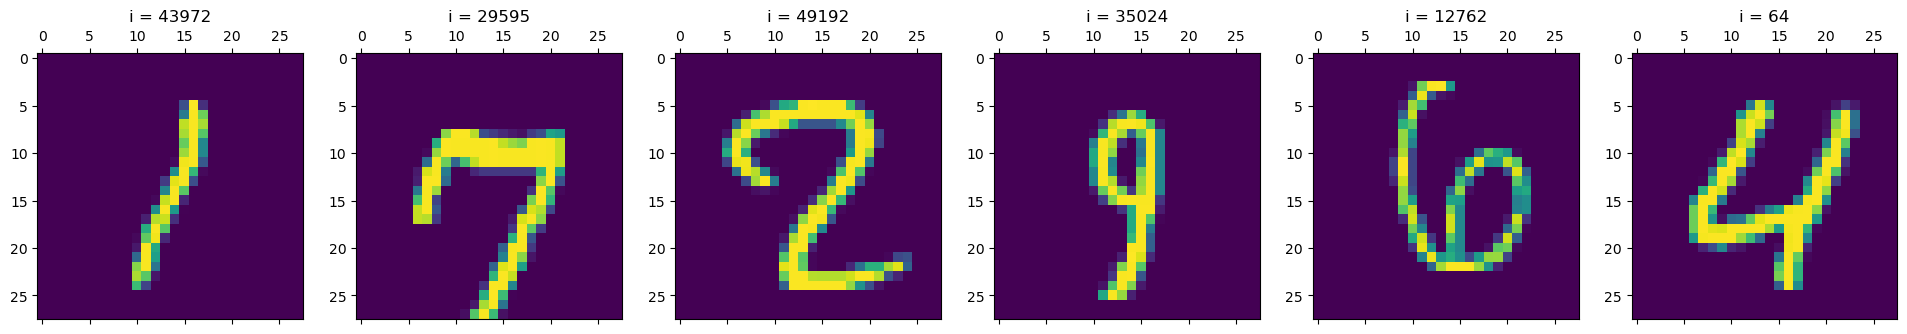

In [29]:
fig = plt.figure(figsize=(24, 4)) 
gs = fig.add_gridspec(1, 6)  
for a in range(6):
    ax = fig.add_subplot(gs[0,a])
    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.matshow(X_train[i])

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
X_train_flattend = X_train.reshape(len(X_train), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_train_flattend.shape

(60000, 784)

In [33]:
X_test_flattend = X_test.reshape(len(X_test), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_test_flattend.shape

(10000, 784)

In [34]:
print("Train Data No. =", j := random.randint(0, len(X_train)-1))
X_train_flattend[j]

Train Data No. = 49083


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

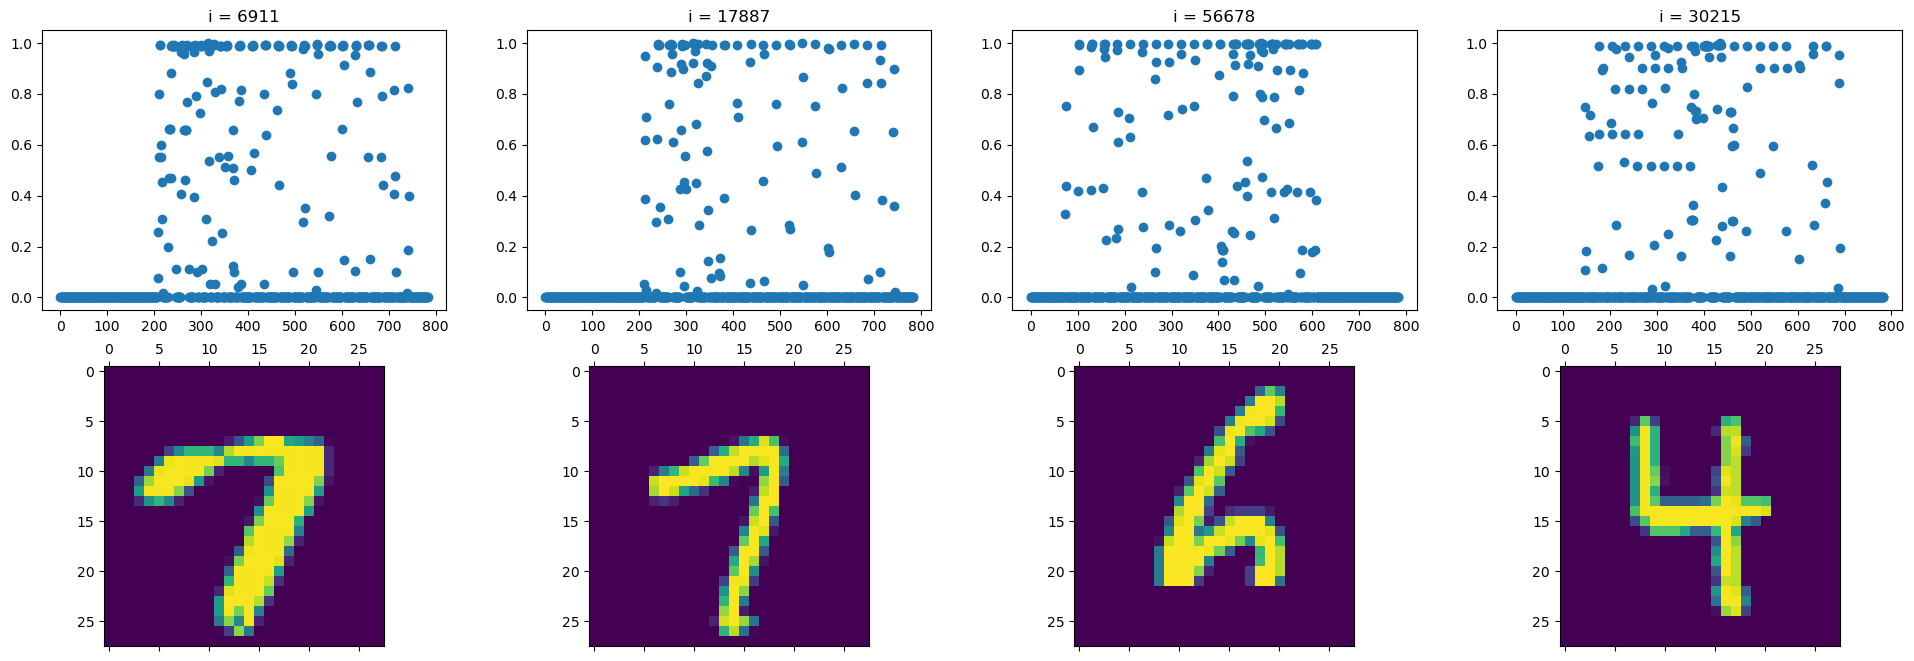

In [35]:
fig = plt.figure(figsize=(24, 8)) 
gs = fig.add_gridspec(2, 4)  

bins = range(X_train_flattend.shape[1])

for a in range(4):
    ax = fig.add_subplot(gs[0, a])    
    ay = fig.add_subplot(gs[1, a])    

    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.scatter(bins, X_train_flattend[i])
    ay.matshow(X_train[i])

## Model_1 architechture and training

<img src="digits_nn.jpg" />

In [36]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
])

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_1.fit(X_train_flattend, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4691 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9257


In [37]:
model_1.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.9242


[0.27380719780921936, 0.9241999983787537]

In [38]:
y_predicted = model_1.predict(X_test_flattend)
y_predicted.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Output (2072) = [2.4262629e-03 1.5938869e-05 4.2960785e-02 9.7638035e-01 7.3936926e-03
 8.9835125e-01 6.3462358e-07 9.2057511e-05 5.5221850e-01 9.2775542e-03]
Predicted Number = 3 with prediction % = 97.63803482055664


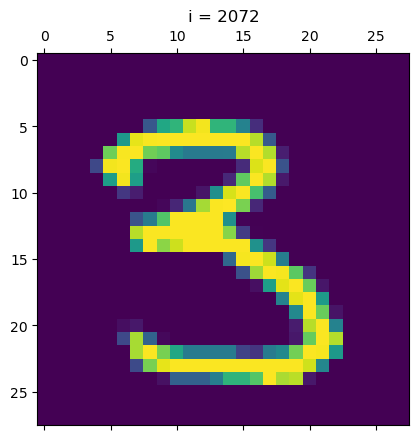

In [40]:
plt.matshow(X_test[(i := random.randint(0, len(X_test) - 1))])
plt.title('i = ' + str(i))
print('Output (' + str(i) + ') = ' + str(y_predicted[i]))
predictedNum, predictionPercentage = np.argmax(y_predicted[i]), max(y_predicted[i]) * 100
print(f'Predicted Number = {predictedNum} with prediction % = {predictionPercentage}')

In [41]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    3,    3,    2,    1,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [  12,    6,  941,   13,    7,    2,   13,    8,   25,    5],
       [   6,    0,   27,  910,    0,   28,    1,   10,   12,   16],
       [   2,    1,    8,    1,  895,    0,   10,    4,    8,   53],
       [  14,    2,    6,   28,    7,  786,   13,    5,   23,    8],
       [  16,    3,    7,    1,    7,   11,  910,    2,    1,    0],
       [   2,    5,   25,    4,    6,    1,    0,  937,    2,   46],
       [  15,    7,    9,   20,    9,   34,   10,    9,  841,   20],
       [  12,    6,    1,    9,   17,    6,    0,   12,    4,  942]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

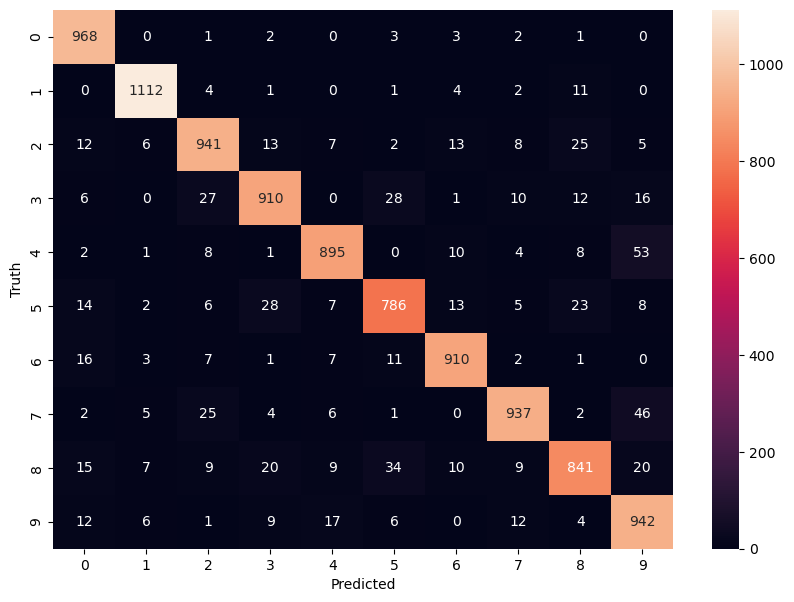

In [42]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')